## Import relevant Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()


In [4]:
from IPython.display import Image

In [5]:
def get_label(img_path):
    img_label = img_path.split('/')
    return img_label[-2]
    

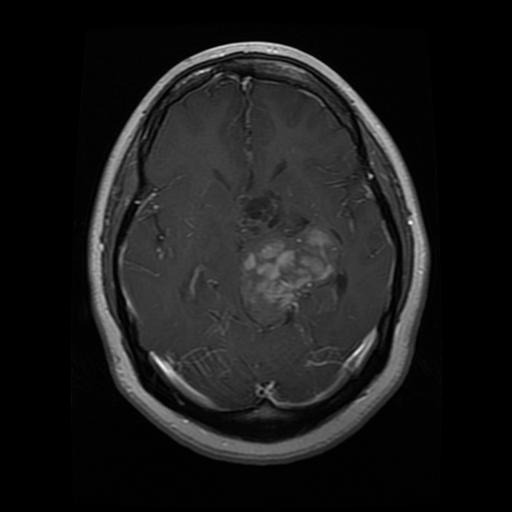

In [6]:
Image("./BrainMRI/Training/glioma_tumor/gg (1).jpg")


In [7]:
get_label('./BrainMRI/Training/glioma_tumor/gg (1).jpg')

'glioma_tumor'

In [8]:
# img_path = "./BrainMRI/Training/glioma_tumor/gg (1).jpg"
# img_label = img_path.split('/')
# print(img_label[-2])

In [9]:
def get_img_and_label(img_path):
    """
    returns image and image label
    args:
    img_path:...
    """
    img = Image(img_path)
    img_label = get_label(img_path)
    return img,img_label

In [10]:
get_img_and_label(img_path='./BrainMRI/Training/glioma_tumor/gg (1).jpg')

(<IPython.core.display.Image object>, 'glioma_tumor')

In [11]:
import os

path ="./BrainMRI/Training/"
#we shall store all the file names in this list
filelist = []

for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))



In [12]:
filelist[:10]

['./BrainMRI/Training/pituitary_tumor/p (403).jpg',
 './BrainMRI/Training/pituitary_tumor/p (16).jpg',
 './BrainMRI/Training/pituitary_tumor/p (697).jpg',
 './BrainMRI/Training/pituitary_tumor/p (689).jpg',
 './BrainMRI/Training/pituitary_tumor/p (445).jpg',
 './BrainMRI/Training/pituitary_tumor/p (213).jpg',
 './BrainMRI/Training/pituitary_tumor/p (621).jpg',
 './BrainMRI/Training/pituitary_tumor/p (753).jpg',
 './BrainMRI/Training/pituitary_tumor/p (315).jpg',
 './BrainMRI/Training/pituitary_tumor/p (423).jpg']

In [13]:
filenames = pd.Series(filelist)

In [14]:
image_labels = []
for i in range(len(filelist)):
    img_labels = get_label(filelist[i])
    image_labels.append(img_labels)

In [15]:
image_labels[:10]

['pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor']

In [16]:
labels = pd.Series(image_labels)

In [17]:
tumor_df = pd.DataFrame({'filenames':filelist,
                         'label':labels})

In [18]:
tumor_df

,filenames,label
0,./BrainMRI/Training/pituitary_tumor/p (403).jpg,pituitary_tumor
1,./BrainMRI/Training/pituitary_tumor/p (16).jpg,pituitary_tumor
2,./BrainMRI/Training/pituitary_tumor/p (697).jpg,pituitary_tumor
3,./BrainMRI/Training/pituitary_tumor/p (689).jpg,pituitary_tumor
4,./BrainMRI/Training/pituitary_tumor/p (445).jpg,pituitary_tumor
...,...,...
2865,./BrainMRI/Training/glioma_tumor/gg (760).jpg,glioma_tumor
2866,./BrainMRI/Training/glioma_tumor/gg (241).jpg,glioma_tumor
2867,./BrainMRI/Training/glioma_tumor/gg (382).jpg,glioma_tumor
2868,./BrainMRI/Training/glioma_tumor/gg (579).jpg,glioma_tumor


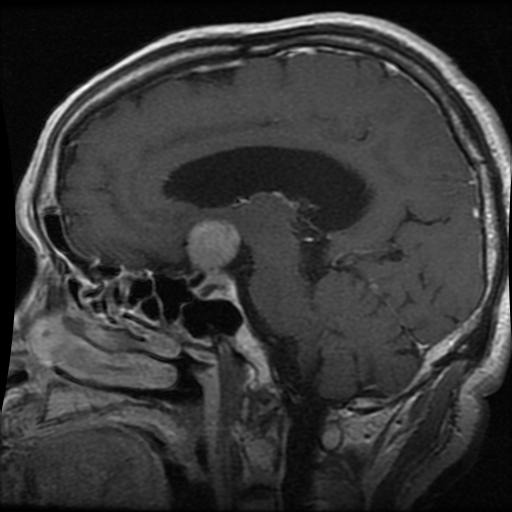

In [19]:
Image(tumor_df['filenames'][0])

In [20]:
tumor_df['label'][0]

'pituitary_tumor'

885


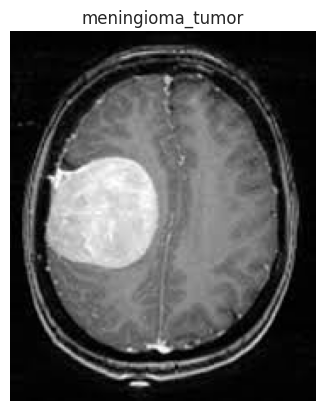

In [21]:
import random
index = random.randint(0,len(tumor_df))
image = plt.imread(tumor_df['filenames'][index])
plt.imshow(image)
plt.grid(visible=None)
plt.title(tumor_df['label'][index])
plt.axis('off');
print(index)

## ImageData Generator

In [22]:
tumor_df['label'].unique()

array(['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor'],
      dtype=object)

In [23]:
label_data = tumor_df['label'].map({'pituitary_tumor':0,
                      'meningioma_tumor':1,
                      'no_tumor':2,
                      'glioma_tumor':3})

In [24]:
class_names = ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [27]:
from sklearn.model_selection import train_test_split
X = tumor_df['filenames']
y = label_data

In [28]:
X_train , X_val , y_train , y_val = train_test_split(X,
                                                      y,
                                                      random_state=42)

In [29]:
X_train.shape , y_train.shape

((2152,), (2152,))

In [30]:
X_train[:10],y_train[:10]

(2646        ./BrainMRI/Training/glioma_tumor/gg (27).jpg
 1913          ./BrainMRI/Training/no_tumor/image(69).jpg
 438      ./BrainMRI/Training/pituitary_tumor/p (192).jpg
 1656         ./BrainMRI/Training/no_tumor/image(135).jpg
 1411    ./BrainMRI/Training/meningioma_tumor/m3 (71).jpg
 1808         ./BrainMRI/Training/no_tumor/image(145).jpg
 166      ./BrainMRI/Training/pituitary_tumor/p (815).jpg
 59       ./BrainMRI/Training/pituitary_tumor/p (332).jpg
 611      ./BrainMRI/Training/pituitary_tumor/p (618).jpg
 530      ./BrainMRI/Training/pituitary_tumor/p (638).jpg
 Name: filenames, dtype: object,
 2646    3
 1913    2
 438     0
 1656    2
 1411    1
 1808    2
 166     0
 59      0
 611     0
 530     0
 Name: label, dtype: int64)

In [31]:
X_val[:10],y_val[:10]

(443       ./BrainMRI/Training/pituitary_tumor/p (442).jpg
 2394        ./BrainMRI/Training/glioma_tumor/gg (483).jpg
 761       ./BrainMRI/Training/pituitary_tumor/p (803).jpg
 651        ./BrainMRI/Training/pituitary_tumor/p (79).jpg
 2674        ./BrainMRI/Training/glioma_tumor/gg (288).jpg
 1397    ./BrainMRI/Training/meningioma_tumor/m3 (190).jpg
 2766        ./BrainMRI/Training/glioma_tumor/gg (326).jpg
 1684           ./BrainMRI/Training/no_tumor/image(96).jpg
 789       ./BrainMRI/Training/pituitary_tumor/p (232).jpg
 2661        ./BrainMRI/Training/glioma_tumor/gg (825).jpg
 Name: filenames, dtype: object,
 443     0
 2394    3
 761     0
 651     0
 2674    3
 1397    1
 2766    3
 1684    2
 789     0
 2661    3
 Name: label, dtype: int64)

## Create Batches DataSet

In [32]:
# Define image size
IMG_SIZE = 32

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [33]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [34]:
get_image_label(tumor_df['filenames'][0],tumor_df['label'][0])


2022-09-02 21:48:01.833942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-02 21:48:01.897942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-02 21:48:01.897999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-02 21:48:01.898812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

(<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
 array([[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.01666667, 0.01666667, 0.01666667],
         [0.01568628, 0.01568628, 0.01568628],
         [0.02058824, 0.02058824, 0.02058824]],
 
        [[0.0254902 , 0.0254902 , 0.0254902 ],
         [0.02058824, 0.02058824, 0.02058824],
         [0.02254902, 0.02254902, 0.02254902],
         ...,
         [0.02254902, 0.02254902, 0.02254902],
         [0.02647059, 0.02647059, 0.02647059],
         [0.01960785, 0.01960785, 0.01960785]],
 
        [[0.01960784, 0.01960784, 0.01960784],
         [0.02352941, 0.02352941, 0.02352941],
         [0.01764706, 0.01764706, 0.01764706],
         ...,
         [0.01764706, 0.01764706, 0.01764706],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02058824, 0.02058824, 0.02058824]],
 
        ...,
 
        [[0.1901961 , 0.1901961 , 

In [35]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [36]:
train_data = create_data_batches(X=X_train, y=y_train)
val_data = create_data_batches(X=X_val, y=y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)))

## Build The model

In [38]:
from tensorflow.keras import models , layers

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_data, epochs=10, 
                    validation_data=val_data)

Epoch 1/10


2022-09-02 21:48:05.714757: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-02 21:48:08.162251: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 21:48:08.204603: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 21:48:08.204670: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-02 21:48:08.239798: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-02 21:48:08.239914: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


68/68 [==============================] - 9s 50ms/step - loss: 1.5267 - accuracy: 0.2946 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 2/10
68/68 [==============================] - 3s 44ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 3/10
68/68 [==============================] - 3s 39ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 4/10
68/68 [==============================] - 3s 42ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 5/10
68/68 [==============================] - 3s 40ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 6/10
68/68 [==============================] - 3s 42ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 7/10
68/68 [==============================] - 3s 50ms/step - loss: 1.3863 - accuracy: 0.2835 - val_loss: 1.3863 - val_accuracy: 0.3022
Epoch 8/10
68/68 [======

## Another Model

### Data Agumentation

In [42]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [43]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [44]:
model_1 = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
      resize_and_rescale,
      data_augmentation,
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(60,activation='relu'),
      layers.Dense(4,activation='softmax')
])

In [45]:
# compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [46]:
# fit the model to the data
histroy_1 = model_1.fit(train_data, epochs=10, 
                    validation_data=val_data)

Epoch 1/10
68/68 [==============================] - 12s 148ms/step - loss: 1.3451 - accuracy: 0.3002 - val_loss: 1.3202 - val_accuracy: 0.4011
Epoch 2/10
68/68 [==============================] - 10s 146ms/step - loss: 1.2703 - accuracy: 0.4080 - val_loss: 1.1580 - val_accuracy: 0.4568
Epoch 3/10
68/68 [==============================] - 10s 141ms/step - loss: 1.0938 - accuracy: 0.5367 - val_loss: 1.0477 - val_accuracy: 0.5515
Epoch 4/10
68/68 [==============================] - 10s 147ms/step - loss: 1.0021 - accuracy: 0.5953 - val_loss: 1.0334 - val_accuracy: 0.5738
Epoch 5/10
68/68 [==============================] - 10s 147ms/step - loss: 0.9828 - accuracy: 0.5892 - val_loss: 0.9739 - val_accuracy: 0.5864
Epoch 6/10
68/68 [==============================] - 10s 149ms/step - loss: 0.9578 - accuracy: 0.6036 - val_loss: 0.9556 - val_accuracy: 0.6017
Epoch 7/10
68/68 [==============================] - 10s 151ms/step - loss: 0.9615 - accuracy: 0.6050 - val_loss: 1.1400 - val_accuracy: 0.4986

In [47]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [48]:
history_1_df = pd.DataFrame(histroy_1.history)

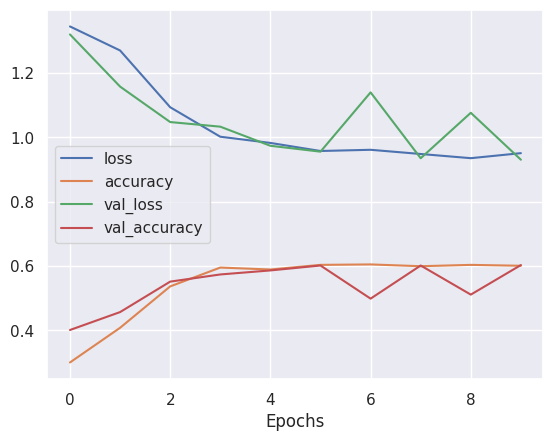

In [49]:
history_1_df.plot()
plt.xlabel('Epochs');

## Best learning Rate

In [50]:
model_3 = tf.keras.Sequential([
    resize_and_rescale,
      data_augmentation,
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(60,activation='relu'),
      layers.Dense(4,activation='softmax')
           ])
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [51]:
# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [52]:
histroy_3 = model_3.fit(train_data,
                        epochs =10,
                        validation_data=val_data,
                       callbacks=[lr_schedular])

Epoch 1/10
68/68 [==============================] - 10s 134ms/step - loss: 1.3442 - accuracy: 0.3095 - val_loss: 1.2775 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - 9s 133ms/step - loss: 1.1802 - accuracy: 0.4726 - val_loss: 1.0889 - val_accuracy: 0.5474 - lr: 0.0011
Epoch 3/10
68/68 [==============================] - 9s 131ms/step - loss: 1.0429 - accuracy: 0.5516 - val_loss: 1.0831 - val_accuracy: 0.5390 - lr: 0.0013
Epoch 4/10
68/68 [==============================] - 9s 132ms/step - loss: 1.0334 - accuracy: 0.5599 - val_loss: 0.9486 - val_accuracy: 0.6114 - lr: 0.0014
Epoch 5/10
68/68 [==============================] - 10s 150ms/step - loss: 0.9499 - accuracy: 0.6050 - val_loss: 0.9302 - val_accuracy: 0.6114 - lr: 0.0016
Epoch 6/10
68/68 [==============================] - 10s 147ms/step - loss: 0.9994 - accuracy: 0.5818 - val_loss: 0.9465 - val_accuracy: 0.6072 - lr: 0.0018
Epoch 7/10
68/68 [==============================] - 10s 150ms/step 

In [53]:
histroy_3_df = pd.DataFrame(histroy_3.history)

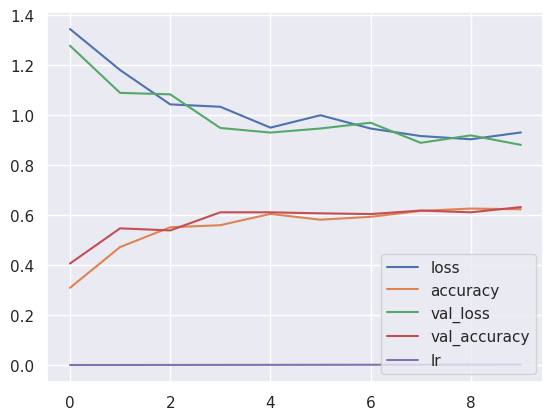

In [54]:
histroy_3_df.plot();

lrs [0.001      0.00112202 0.00125893 0.00141254 0.00158489 0.00177828
 0.00199526 0.00223872 0.00251189 0.00281838]


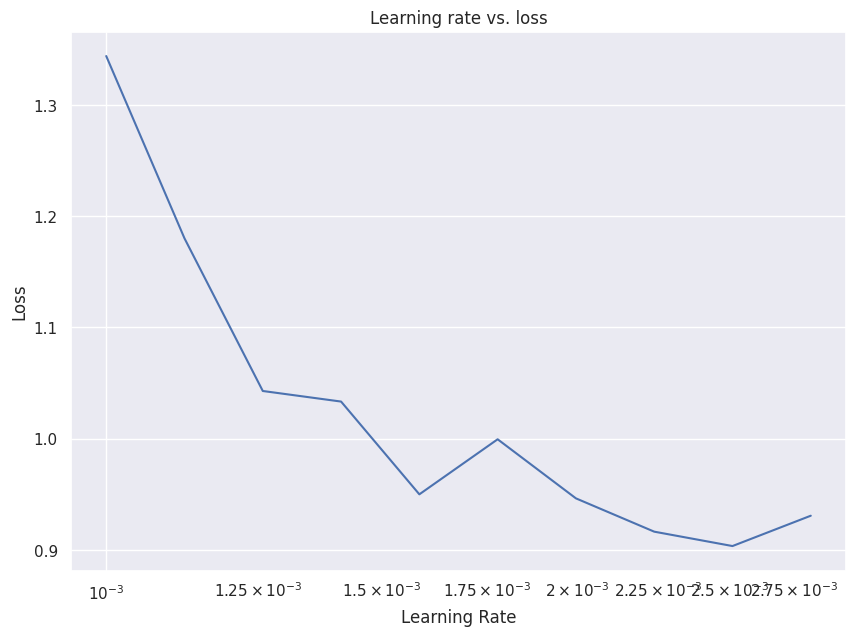

In [58]:
# Plot the learning rate versus the loss
lrs = 1e-3*(10**(np.arange(10)/20))
print('lrs',lrs)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, histroy_3_df["loss"]) # we want the x-axis (learning rate) to be log scale
plt.grid(True)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [76]:
# set random_seed 
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), padding="same",activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.BatchNormalization(axis=1),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding="same"),
    layers.MaxPool2D((3,3)),
    layers.BatchNormalization(axis=1),
    layers.Dropout(0.25),
    layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.BatchNormalization(axis=1),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='relu'),
    layers.Dense(4,activation='softmax')
    
])

In [77]:
## compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.5e-3),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])

In [75]:
history_4 = model_4.fit(train_data,
                       validation_data=val_data,
                       epochs = 10,
                       verbose = 1)

Epoch 1/10
68/68 [==============================] - 13s 182ms/step - loss: 6.1157 - accuracy: 0.2718 - val_loss: 1.3593 - val_accuracy: 0.3022
Epoch 2/10
68/68 [==============================] - 12s 180ms/step - loss: 1.3595 - accuracy: 0.2835 - val_loss: 1.3487 - val_accuracy: 0.3022
Epoch 3/10
68/68 [==============================] - 13s 186ms/step - loss: 1.3526 - accuracy: 0.2672 - val_loss: 1.3452 - val_accuracy: 0.3022
Epoch 4/10
68/68 [==============================] - 13s 195ms/step - loss: 1.3507 - accuracy: 0.2881 - val_loss: 1.3446 - val_accuracy: 0.2716
Epoch 5/10
68/68 [==============================] - 17s 253ms/step - loss: 1.3504 - accuracy: 0.2932 - val_loss: 1.3444 - val_accuracy: 0.2716
Epoch 6/10
68/68 [==============================] - 20s 293ms/step - loss: 1.3500 - accuracy: 0.2895 - val_loss: 1.3444 - val_accuracy: 0.2716
Epoch 7/10
68/68 [==============================] - 18s 258ms/step - loss: 1.3501 - accuracy: 0.2932 - val_loss: 1.3441 - val_accuracy: 0.2716

In [88]:
from keras.models import Sequential
# from tensorflow.keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization

In [100]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential()
inputShape = (32, 32, 3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model_5.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization(axis=chanDim))
model_5.add(MaxPooling2D(pool_size=(3, 3)))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(64, (3, 3), padding="same"))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization(axis=chanDim))
model_5.add(Conv2D(64, (3, 3), padding="same"))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization(axis=chanDim))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(128, (3, 3), padding="same"))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization(axis=chanDim))
model_5.add(Conv2D(128, (3, 3), padding="same"))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization(axis=chanDim))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(1024))
model_5.add(Activation("relu"))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
model_5.add(Dense(4))
model_5.add(Activation("softmax"))

In [101]:
## compile the model
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.5e-3),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])

In [102]:
history_5 = model_5.fit(train_data,
                       validation_data=val_data,
                       epochs = 40,
                       verbose = 1)

Epoch 1/40
68/68 [==============================] - 4s 44ms/step - loss: 1.5959 - accuracy: 0.5256 - val_loss: 1.6000 - val_accuracy: 0.4513
Epoch 2/40
68/68 [==============================] - 3s 42ms/step - loss: 1.0606 - accuracy: 0.6269 - val_loss: 2.8111 - val_accuracy: 0.1323
Epoch 3/40
68/68 [==============================] - 3s 42ms/step - loss: 0.8663 - accuracy: 0.6743 - val_loss: 3.8563 - val_accuracy: 0.1309
Epoch 4/40
68/68 [==============================] - 3s 43ms/step - loss: 0.7780 - accuracy: 0.7072 - val_loss: 2.8573 - val_accuracy: 0.2618
Epoch 5/40
68/68 [==============================] - 3s 44ms/step - loss: 0.7287 - accuracy: 0.7291 - val_loss: 3.0275 - val_accuracy: 0.3747
Epoch 6/40
68/68 [==============================] - 3s 47ms/step - loss: 0.6818 - accuracy: 0.7398 - val_loss: 2.7704 - val_accuracy: 0.5334
Epoch 7/40
68/68 [==============================] - 3s 46ms/step - loss: 0.6352 - accuracy: 0.7644 - val_loss: 1.5142 - val_accuracy: 0.5446
Epoch 8/40
68

## Save the model

In [107]:
tf.keras.models.save_model(model_5,'./')

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


In [113]:
model_5.save('./')

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


## Make Some Prediction